# Total Electricity

In [56]:
import pandas as pd
from prophet import Prophet
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import logging
%matplotlib inline

In [57]:
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)


In [58]:
def calculate_mape(y_true, y_pred):
  return mean_absolute_percentage_error(y_true, y_pred) * 100

## Cluster 1

In [59]:
# Pull the training, testing, and validation data
original_train_data = pd.read_parquet('../dataset/cluster_1/training.parquet')
original_test_data = pd.read_parquet('../dataset/cluster_1/test.parquet')
original_validation_data =  pd.read_parquet('../dataset/cluster_1/validation.parquet')

In [60]:
# Calculate the sum to get the total electricity per customer per day and format it appropriately
train_total_consumption = original_train_data.sum(axis=0)
train_data = train_total_consumption.to_frame(name='y').reset_index()
train_data.columns = ['ds', 'y']

test_total_consumption = original_test_data.sum(axis=0)
test_data = test_total_consumption.to_frame(name='y').reset_index()
test_data.columns = ['ds', 'y']

validation_total_consumption = original_validation_data.sum(axis=0)
validation_data = validation_total_consumption.to_frame(name='y').reset_index()
validation_data.columns = ['ds', 'y']

In [61]:
# Create and fit the prophet model
model = Prophet()
model.fit(train_data)

In [62]:
# Forecast on the testing and validation data
test_forecast = model.predict(test_data)
validation_forecast = model.predict(validation_data)

### Validation

In [63]:
plot_plotly(model, validation_forecast)

In [64]:
plot_components_plotly(model, validation_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [65]:
# Find MAPE
actual_values = np.array(validation_data['y'])
predicted_values = np.array(validation_forecast['yhat'])

validation_mape = calculate_mape(actual_values, predicted_values)
validation_mape

7.513581569820864

### Test

In [66]:
plot_plotly(model, test_forecast)

In [67]:
plot_components_plotly(model, test_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [68]:
# Find MAPE
actual_values = np.array(test_data['y'])
predicted_values = np.array(test_forecast['yhat'])

test_mape = calculate_mape(actual_values, predicted_values)
test_mape

6.420125539075773

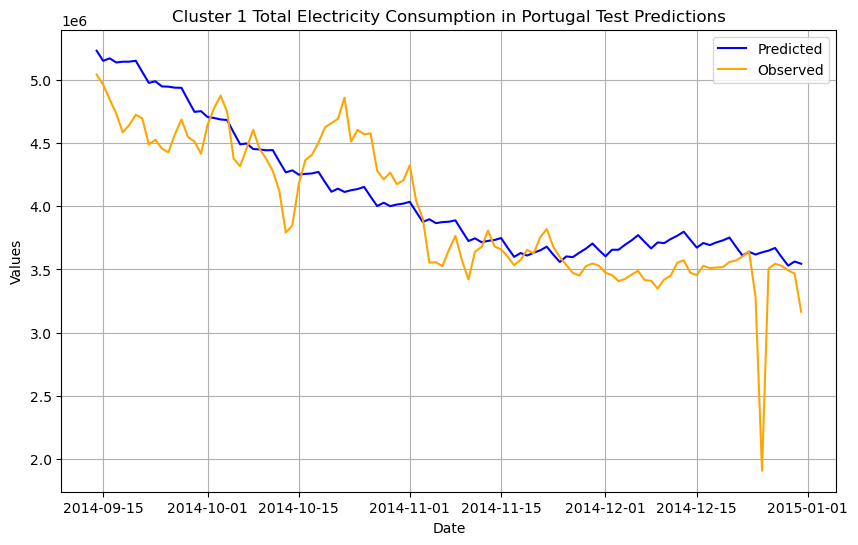

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(test_data['ds']), test_forecast['yhat'], label='Predicted', color='blue')
plt.plot(pd.to_datetime(test_data['ds']), test_data['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 1 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

### Train

In [70]:
# Find MAPE
train_forecast = model.predict(train_data)
actual_values = np.array(train_data['y'])
predicted_values = np.array(train_forecast['yhat'])

train_mape = calculate_mape(actual_values, predicted_values)
train_mape

3.7544624679594385

## Cluster 2

In [71]:
# Pull the training, testing, and validation data
original_train_data = pd.read_parquet('../dataset/cluster_2/training.parquet')
original_test_data = pd.read_parquet('../dataset/cluster_2/test.parquet')
original_validation_data =  pd.read_parquet('../dataset/cluster_2/validation.parquet')

In [72]:
# Calculate the sum to get the total electricity per customer per day and format it appropriately
train_total_consumption = original_train_data.sum(axis=0)
train_data = train_total_consumption.to_frame(name='y').reset_index()
train_data.columns = ['ds', 'y']

test_total_consumption = original_test_data.sum(axis=0)
test_data = test_total_consumption.to_frame(name='y').reset_index()
test_data.columns = ['ds', 'y']

validation_total_consumption = original_validation_data.sum(axis=0)
validation_data = validation_total_consumption.to_frame(name='y').reset_index()
validation_data.columns = ['ds', 'y']

In [73]:
# Fit prophet model
model2 = Prophet()
model2.fit(train_data)

In [74]:
# Forecasting
train_forecast = model2.predict(train_data)
test_forecast = model2.predict(test_data)
validation_forecast = model2.predict(validation_data)

### Validation

In [75]:
plot_plotly(model2, validation_forecast)

In [76]:
plot_components_plotly(model2, validation_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [77]:
# Find MAPE
actual_values = np.array(validation_data['y'])
predicted_values = np.array(validation_forecast['yhat'])

validation_mape = calculate_mape(actual_values, predicted_values)
validation_mape

6.860222263557579

### Test

In [78]:
plot_plotly(model2, test_forecast)

In [79]:
plot_components_plotly(model2, test_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



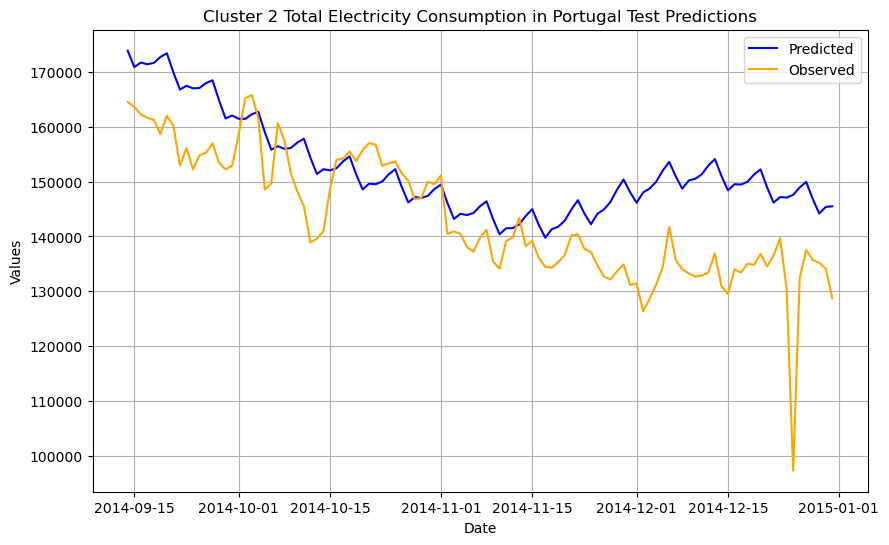

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(test_data['ds']), test_forecast['yhat'], label='Predicted', color='blue')
plt.plot(pd.to_datetime(test_data['ds']), test_data['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 2 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
# Find MAPE
actual_values = np.array(test_data['y'])
predicted_values = np.array(test_forecast['yhat'])

test_mape = calculate_mape(actual_values, predicted_values)
test_mape

7.072472571286046

### Train

In [82]:
# Find MAPE
actual_values = np.array(train_data['y'])
predicted_values = np.array(train_forecast['yhat'])

train_mape = calculate_mape(actual_values, predicted_values)
train_mape

3.3131587269604372

## Cluster 3

In [83]:
# Pull the training, testing, and validation data
original_train_data = pd.read_parquet('../dataset/cluster_3/training.parquet')
original_test_data = pd.read_parquet('../dataset/cluster_3/test.parquet')
original_validation_data =  pd.read_parquet('../dataset/cluster_3/validation.parquet')

In [84]:
# Calculate the sum to get the total electricity per customer per day and format it appropriately
train_total_consumption = original_train_data.sum(axis=0)
train_data = train_total_consumption.to_frame(name='y').reset_index()
train_data.columns = ['ds', 'y']

test_total_consumption = original_test_data.sum(axis=0)
test_data = test_total_consumption.to_frame(name='y').reset_index()
test_data.columns = ['ds', 'y']

validation_total_consumption = original_validation_data.sum(axis=0)
validation_data = validation_total_consumption.to_frame(name='y').reset_index()
validation_data.columns = ['ds', 'y']

In [85]:
# Fit prophet model
model3 = Prophet()
model3.fit(train_data)

In [86]:
# Forecasting
train_forecast = model3.predict(train_data)
test_forecast = model3.predict(test_data)
validation_forecast = model3.predict(validation_data)

### Validation

In [87]:
plot_plotly(model3, validation_forecast)

In [88]:
plot_components_plotly(model3, validation_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [89]:
# Find MAPE
actual_values = np.array(validation_data['y'])
predicted_values = np.array(validation_forecast['yhat'])

validation_mape = calculate_mape(actual_values, predicted_values)
validation_mape

5.67400894557479

### Test

In [90]:
plot_plotly(model3, test_forecast)

In [91]:
plot_components_plotly(model3, test_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



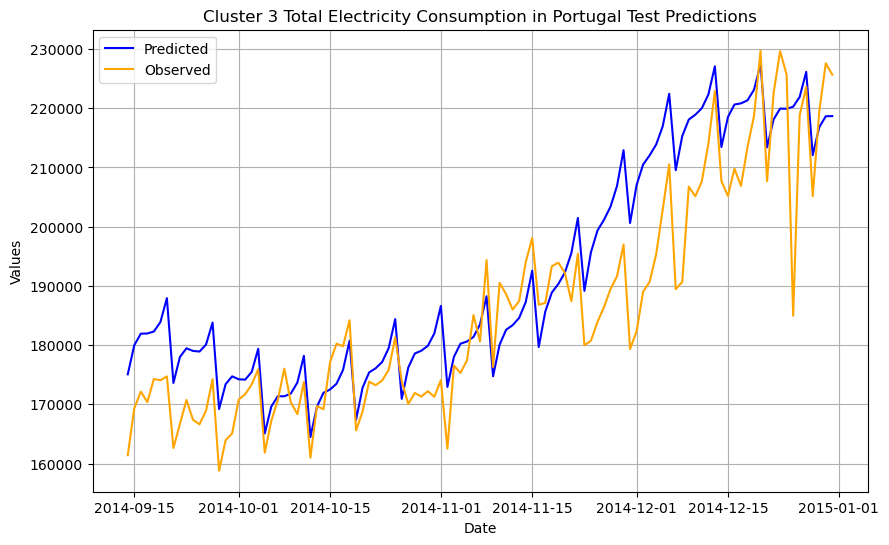

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(test_data['ds']), test_forecast['yhat'], label='Predicted', color='blue')
plt.plot(pd.to_datetime(test_data['ds']), test_data['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 3 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# Find MAPE
actual_values = np.array(test_data['y'])
predicted_values = np.array(test_forecast['yhat'])

test_mape = calculate_mape(actual_values, predicted_values)
test_mape

4.422495491895859

### Train

In [94]:
# Find MAPE
actual_values = np.array(train_data['y'])
predicted_values = np.array(train_forecast['yhat'])

train_mape = calculate_mape(actual_values, predicted_values)
train_mape

3.344759155758306

## Cluster 4

In [95]:
# Pull the training, testing, and validation data
original_train_data = pd.read_parquet('../dataset/cluster_4/training.parquet')
original_test_data = pd.read_parquet('../dataset/cluster_4/test.parquet')
original_validation_data =  pd.read_parquet('../dataset/cluster_4/validation.parquet')

In [96]:
# Calculate the sum to get the total electricity per customer per day and format it appropriately
train_total_consumption = original_train_data.sum(axis=0)
train_data = train_total_consumption.to_frame(name='y').reset_index()
train_data.columns = ['ds', 'y']

test_total_consumption = original_test_data.sum(axis=0)
test_data = test_total_consumption.to_frame(name='y').reset_index()
test_data.columns = ['ds', 'y']

validation_total_consumption = original_validation_data.sum(axis=0)
validation_data = validation_total_consumption.to_frame(name='y').reset_index()
validation_data.columns = ['ds', 'y']

In [97]:
# Fit prophet model
model4 = Prophet()
model4.fit(train_data)

In [98]:
# Forecasting
train_forecast = model4.predict(train_data)
test_forecast = model4.predict(test_data)
validation_forecast = model4.predict(validation_data)

### Validation

In [99]:
plot_plotly(model4, validation_forecast)

In [100]:
plot_components_plotly(model4, validation_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [101]:
# Find MAPE
actual_values = np.array(validation_data['y'])
predicted_values = np.array(validation_forecast['yhat'])

validation_mape = calculate_mape(actual_values, predicted_values)
validation_mape

10.233485715803768

### Test

In [102]:
plot_plotly(model4, test_forecast)

In [103]:
plot_components_plotly(model4, test_forecast)

c:\Users\brian\anaconda3\Lib\site-packages\plotly\io\_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



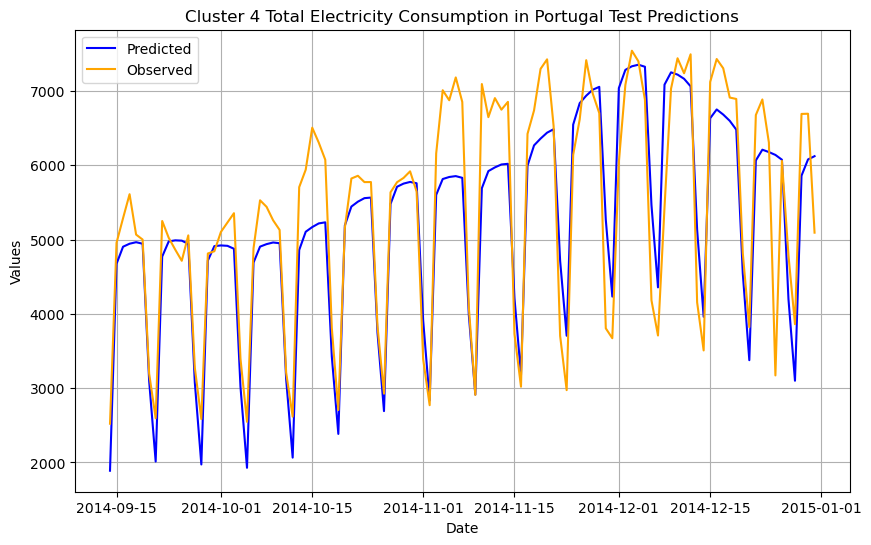

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(test_data['ds']), test_forecast['yhat'], label='Predicted', color='blue')
plt.plot(pd.to_datetime(test_data['ds']), test_data['y'], label='Observed', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cluster 4 Total Electricity Consumption in Portugal Test Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
# Find MAPE
actual_values = np.array(test_data['y'])
predicted_values = np.array(test_forecast['yhat'])

test_mape = calculate_mape(actual_values, predicted_values)
test_mape

10.399523122332544

### Train

In [106]:
# Find MAPE
actual_values = np.array(train_data['y'])
predicted_values = np.array(train_forecast['yhat'])

train_mape = calculate_mape(actual_values, predicted_values)
train_mape

8.674779542586736